<a href="https://colab.research.google.com/github/jjasira/Derivative-pricing/blob/main/DerivativePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

**Binomial Pricing Model**

In [ ]:
def binomial_call_full(S_ini, K, T, r, u, d, N):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk neutral probabilities (probs)
    C = np.zeros([N + 1, N + 1])  # Call prices
    S = np.zeros([N + 1, N + 1])  # Underlying price
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
    return C[0, 0], C, S

**Binomial pricing model for put options**

In [ ]:
def binomial_put_full(S_ini, K, T, r, u, d, N):
    dt = T / N # define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability
    P = np.zeros([N + 1, N + 1])  # put prices
    S = np.zeros([N + 1, N + 1])  # underlying prices
    for i in range(0, N + 1):
        P[N, i] = max(K - (S_ini * (u ** (i)) * (d ** (N - 1))), 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            p[j , 1] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
    return P[0, 0], P, S

The function, as you can see, is able to compute the evolution of the underlying asset  𝑆𝑡
 , the price of the call option at each node of the tree,  𝐶𝑡
 , and also the  Δ𝑡
  (number of shares in terms of exposure) in each node of the tree.
Let's start by adjusting the inputs  𝑢
  and  𝑑
  to match underlying volatility. As we have covered in the notes/videos for the lesson, we know that adjustment will lead to:

𝑢=𝑒𝜎𝑑𝑡√
  and  𝑑=𝑒−𝜎𝑑𝑡√


Now, assume that we know the underlying stock volatility for the next year (e.g.,  𝜎=30%
 ). (For now, let's take this number as given.)

We can modify our previous functions to incorporate the volatility adjustment to  𝑢
  and  𝑑
 :All rights reserved WQU WorldQuant University QQQQ

In [ ]:
def call_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta

In [ ]:
Call_price, Call_price_tree, Underlying_price_tree, Delta = call_option_delta(100, 100, 0.25, 0.05, 0.25, 500)
print(Call_price)
print(Delta)

5.595912369129307
[[0.56451204 0.         0.         ... 0.         0.         0.        ]
 [0.54674926 0.58201851 0.         ... 0.         0.         0.        ]
 [0.52885645 0.56438389 0.59939868 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]]


In [ ]:
def put_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(K - S_ini * (u ** (i)) * (d ** (N - i)), 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta

In [ ]:
put_price, put_price_tree, put_underlying_price_tree, put_delta = put_option_delta(100, 100, 0.25, 0.05, 0.25, 500)
print(put_price)
print(put_delta)

4.3536924185160215
[[-0.43548796  0.          0.         ...  0.          0.
   0.        ]
 [-0.45325074 -0.41798149  0.         ...  0.          0.
   0.        ]
 [-0.47114355 -0.43561611 -0.40060132 ...  0.          0.
   0.        ]
 ...
 [-1.         -1.         -1.         ...  0.          0.
   0.        ]
 [-1.         -1.         -1.         ...  0.          0.
   0.        ]
 [-1.         -1.         -1.         ...  0.          0.
   0.        ]]


In [ ]:
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S

In [ ]:
def american_option_vol(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

    return C[0, 0], C, S

In [ ]:
print(american_option(50, 52, 2, 0.05, 1.2, 0.8, 2,"P"))

(np.float64(5.089632474198373), array([[ 5.08963247,  0.        ,  0.        ],
       [12.        ,  1.41475309,  0.        ],
       [20.        ,  4.        ,  0.        ]]), array([[50.,  0.,  0.],
       [40., 60.,  0.],
       [32., 48., 72.]]))


##Trinomial Derivative pricing model##


In [ ]:
class TrinomialModel(object):  # Here we start defining our 'class' --> Trinomial Model!
    # First, a method to initialize our `TrinomialModel` algorithm!
    def __init__(self, S0, r, sigma, mat):
        self.__s0 = S0
        self.__r = r
        self.__sigma = sigma
        self.__T = mat

    # Second, we build a method (function) to compute the risk-neutral probabilities!
    def __compute_probs(self):
        self.__pu = (
            (
                np.exp(self.__r * self.__h / 2)
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pd = (
            (
                -np.exp(self.__r * self.__h / 2)
                + np.exp(self.__sigma * np.sqrt(self.__h / 2))
            )
            / (
                np.exp(self.__sigma * np.sqrt(self.__h / 2))
                - np.exp(-self.__sigma * np.sqrt(self.__h / 2))
            )
        ) ** 2
        self.__pm = 1 - self.__pu - self.__pd

        assert 0 <= self.__pu <= 1.0, "p_u should lie in [0, 1] given %s" % self.__pu
        assert 0 <= self.__pd <= 1.0, "p_d should lie in [0, 1] given %s" % self.__pd
        assert 0 <= self.__pm <= 1.0, "p_m should lie in [0, 1] given %s" % self.__pm

    # Third, this method checks whether the given parameters are alright and that we have a 'recombining tree'!
    def __check_up_value(self, up):
        if up is None:
            up = np.exp(self.__sigma * np.sqrt(2 * self.__h))

        assert up > 0.0, "up should be non negative"

        down = 1 / up

        assert down < up, "up <= 1. / up = down"

        self.__up = up
        self.__down = down

    # Four, we use this method to compute underlying stock price path
    def __gen_stock_vec(self, nb):
        vec_u = self.__up * np.ones(nb)
        np.cumprod(vec_u, out=vec_u)

        vec_d = self.__down * np.ones(nb)
        np.cumprod(vec_d, out=vec_d)

        res = np.concatenate((vec_d[::-1], [1.0], vec_u))
        res *= self.__s0

        return res

    # Fifth, we declare a Payoff method to be completed afterwards depending on the instrument we are pricing!
    def payoff(self, stock_vec):
        raise NotImplementedError()

    # Sixth, compute current prices!
    def compute_current_price(self, crt_vec_stock, nxt_vec_prices):
        expectation = np.zeros(crt_vec_stock.size)
        for i in range(expectation.size):
            tmp = nxt_vec_prices[i] * self.__pd
            tmp += nxt_vec_prices[i + 1] * self.__pm
            tmp += nxt_vec_prices[i + 2] * self.__pu

            expectation[i] = tmp

        return self.__discount * expectation

    # Seventh, Option pricing!
    def price(self, nb_steps, up=None):
        assert nb_steps > 0, "nb_steps shoud be > 0"

        nb_steps = int(nb_steps)

        self.__h = self.__T / nb_steps
        self.__check_up_value(up)
        self.__compute_probs()

        self.__discount = np.exp(-self.__r * self.__h)

        final_vec_stock = self.__gen_stock_vec(nb_steps)
        final_payoff = self.payoff(final_vec_stock)
        nxt_vec_prices = final_payoff

        for i in range(1, nb_steps + 1):
            vec_stock = self.__gen_stock_vec(nb_steps - i)
            nxt_vec_prices = self.compute_current_price(vec_stock, nxt_vec_prices)

        return nxt_vec_prices[0]








Next, let's define the initialization and payoff methods for a new class (TrinomialCall) within the TrinomialModel we have just seen

In [ ]:
class TrinomialCall(TrinomialModel):
  def __init__(self, S0, r, sigma, mat, K):
    super(TrinomialCall, self).__init__(S0, r, sigma, mat)
    self.__K = K

  def payoff(self, s):
    return np.maximum(s - self.__K, 0.0)

In [ ]:
class TrinomialPut(TrinomialModel):
  def __init__(self, S0, r, sigma, mat, K):
    super(TrinomialCall, self).__init__(S0, r, sigma, mat)
    self.__K = K

  def payoff(self, s):
    return np.maximum(self.__K - s, 0.0)

In [ ]:
tree = TrinomialCall(100.0, 0.0, 0.3, 1.0, 90.0)

In [ ]:
print(tree.price(1000))

17.01282396512914


**Generating Random Numbers**

In [ ]:

x = np.random.randn(100)
x

array([-0.36325842,  0.01613861,  0.91563228,  0.38209798, -1.51065109,
       -0.10731654,  1.4427267 ,  0.82622667,  0.19663566,  0.35478236,
       -0.16629474,  0.26903988, -0.27023076, -1.573127  ,  0.72421226,
        2.00220772, -1.9350745 ,  1.49239399,  0.60933249,  0.13003935,
        0.69711463, -0.10530561,  0.44576761, -1.83902054, -0.68819571,
        0.24769235,  0.58873222,  0.12484153,  0.70519644,  0.89689727,
       -0.86473473,  0.36658673,  0.12638812, -2.18245198,  0.42879181,
        0.63364073,  0.80230671,  0.9844427 , -0.30421971,  0.36200198,
        0.45960478,  1.20122962, -0.71169381,  0.96442707, -1.73675005,
       -0.39482844,  1.01963428,  0.57752202,  1.14403507, -0.09448379,
       -1.23031457,  0.49454915,  1.43537424,  0.95816924, -0.42297154,
        1.29982333,  0.88134224, -0.49235071,  0.0590112 ,  1.37539743,
       -0.08813658, -0.71865856,  0.4978726 , -1.98571192, -0.09216946,
       -0.78152896,  0.34552958, -1.48416479,  0.30295894,  1.00

AttributeError: Text.set() got an unexpected keyword argument 'fontSize'

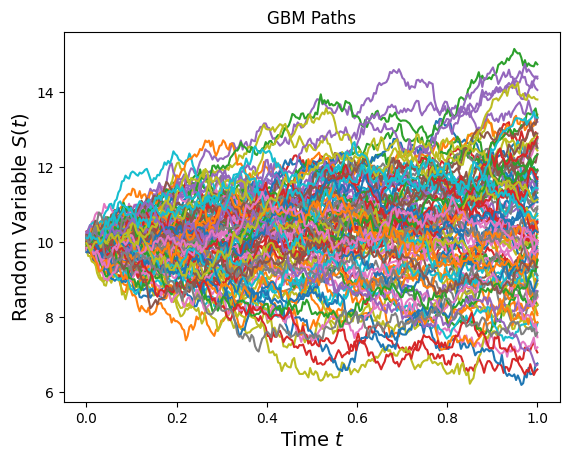

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

T = 1 # years
N = 255 # number of points, number of subintervals = N-1
dt = T / N # time steps in years
t = np.linspace(0, T, N)
M = 100 # Number of paths (Monte Carlo Approach)
vol = 0.18
S0 = 10
mu = 0.08 #drift

dS = S0 * (mu * dt + vol * np.sqrt(dt) * np.random.randn(M, N))
S = S0 + np.cumsum(dS, axis=1)

for i in range(M):
  plt.plot(t, S[i, :])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("Random Variable $S(t)$", fontsize=14)
plt.title("GBM Paths", fontSize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

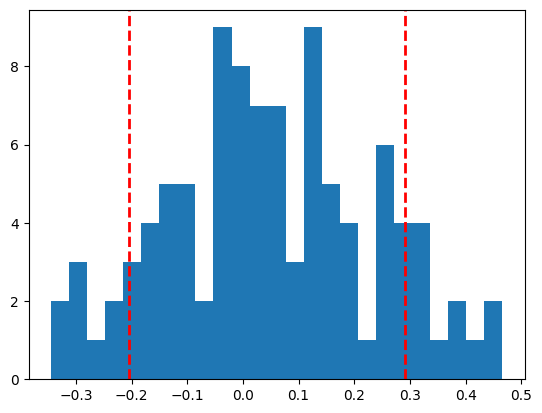

In [ ]:
Returns = (S[:, -1] - S[:, 0]) / S[:, 0]
plt.hist(Returns, bins=25)

plt.axvline(np.percentile(Returns, 10), color="r", linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(Returns, 90), color="r", linestyle='dashed', linewidth=2)

plt.show()

**VAR**

In [ ]:
print(np.percentile(Returns, 5)) # Value at Risk 5%

-0.2541237432984542


**MERTON MODEL AND HESTON MODEL**

In [ ]:

lamb = 1.0  # Lambda of the model
mu = -0.3  # Mu
delta = 0.2  # Delta

r = 0.05  # Risk-free rate
sigma = 0.25  # Volatility
T = 0.5  # Maturity/time period (in years)
S0 = 100  # Current Stock Price
K = 100

Ite = 10000  # Number of simulations (paths)
M = 50  # Number of steps
dt = T / M  # Time-step

In [ ]:
SM = np.zeros((M + 1, Ite))
SM[0] = S0

# rj
rj = lamb * (np.exp(mu + 0.5 * delta**2) - 1)

# Random numbers
z1 = np.random.standard_normal((M + 1, Ite))
z2 = np.random.standard_normal((M + 1, Ite))
y = np.random.poisson(lamb * dt, (M + 1, Ite))

In [ ]:
for t in range(1, M + 1):
    SM[t] = SM[t - 1] * (
        np.exp((r - rj - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1[t])
        + (np.exp(mu + delta * z2[t]) - 1) * y[t]
    )
    SM[t] = np.maximum(
        SM[t], 0.00001
    )  # To ensure that the price never goes below zero!

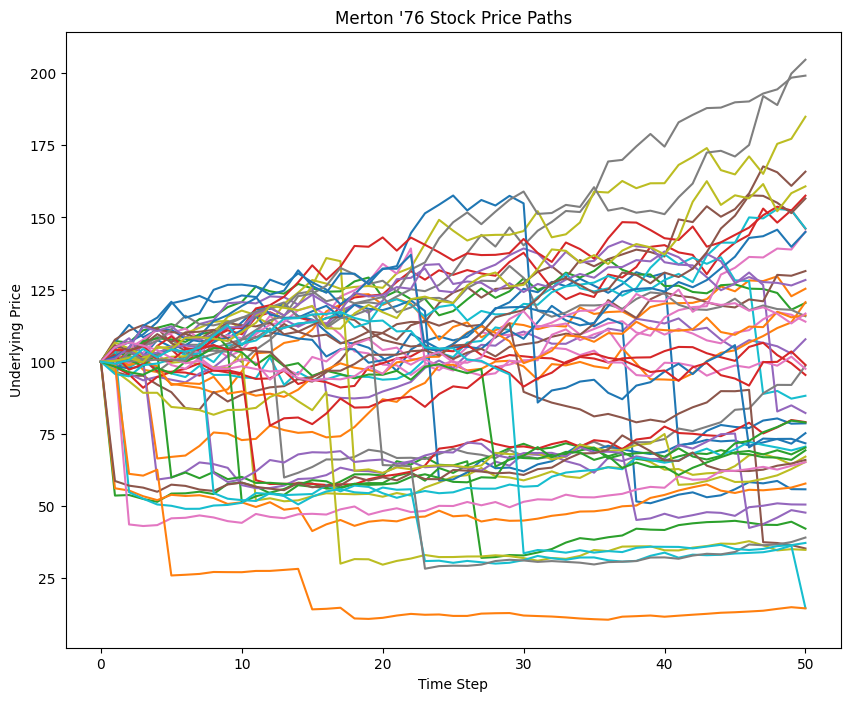

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(SM[:, 100:150])
plt.title("Merton '76 Stock Price Paths")
plt.xlabel("Time Step")
plt.ylabel("Underlying Price")
plt.show()

In [ ]:
def merton_call_mc(S, K, r, T, t):
    payoff = np.maximum(0, S[-1, :] - K)

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

In [ ]:
print(merton_call_mc(SM, K, r, T, t))

147.18169064349865


In [ ]:
def merton_put_mc(S, K, r, T, t):
    payoff = np.maximum(0, K - S[-1, :])

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

**HESTON MODEL**

In [ ]:
def SDE_vol(v0, kappa, theta, sigma, T, M, I, rand, row, cho_matrix):
    dt = T / M  # T = maturity, M = number of time steps
    v = np.zeros((M + 1, I), dtype=float)
    v[0] = v0
    sdt = np.sqrt(dt)  # Sqrt of dt
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        v[t] = np.maximum(0, v[t - 1] + kappa * (theta - v[t - 1]) * dt + np.sqrt(v[t - 1]) * sigma * ran[row] * sdt)
    return v

def Heston_paths(S0, r, v, row, cho_matrix):
    S = np.zeros((M+1, I), dtype=float)
    S[0] = S0
    sdt = np.sqrt(dt)
    for t in range(1, M+1, 1):
        ran = np.dot(cho_matrix, rand[:,t])
        S[t] = S[t - 1] * np.exp((r - 0.5 * v[t-1]) * dt + np.sqrt(v[t-1]) * ran[row] * sdt)

    return S

def random_number_gen(M, I):
    rand = np.random.standard_normal((2, M+1, I))
    return rand

In [ ]:
# Heston given parameters
v0 = 0.04
kappa_v = 2
sigma_v = 0.2
theta_v = 0.04
rho = -0.9


# Generating random numbers from standard normal
rand = random_number_gen(M, I)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2))
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, I, rand, 1, cho_matrix)

# Underlying price process paths
HS = Heston_paths(S0, r, V, 0, cho_matrix)

In [ ]:
def heston_call_mc(S, K, r, T, t):
    payoff = np.maximum(0, S[-1, :] - K)

    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

In [ ]:
print("European Call Price under Heston: ", heston_call_mc(HS, 90, r, T, 0))